In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# **Установка Kaggle**

In [ ]:
! pip install -q kaggle

In [ ]:
 from google.colab import files
 files.upload()

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"ksyushasemina","key":"d27b5404d9c6dd1518cccb1782b9d4a5"}'}

In [ ]:
# Оставили пример загрузки токена для одного человека

import json
token = {"username":"ksyushasemina","key":"d27b5404d9c6dd1518cccb1782b9d4a5"}
with open('/content/kaggle.json', 'w') as file:
  json.dump(token,file)

In [ ]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
# Создаем путь к каталогу kaggle

!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [ ]:
# Разрешение файла json для использования

!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c Fake_New_Detection -p /content

100% 1.56G/1.56G [00:38<00:00, 44.2MB/s]
100% 1.56G/1.56G [00:38<00:00, 43.2MB/s]


In [ ]:
# Распаковка данных и установка датасета

!unzip -o new-york-city-taxi-fare-prediction.zip

Archive:  new-york-city-taxi-fare-prediction.zip
  inflating: GCP-Coupons-Instructions.rtf  
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# **Изучение и очистка данных**

In [ ]:
df_train =  pd.read_csv('train.csv', nrows = 1500000)

# Сохраняем фрагмент датасета, с которым работаем

#df_train.to_csv('new-york-sample.csv',index=False)
#files.download('new-york-sample.csv')

df_train.shape

(1500000, 8)

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.shape

(9914, 7)

In [ ]:
# Взглянем на данные в датасете train и в датасете test

In [ ]:
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [ ]:
# Смотрим информацию, проверяем наличие NA, типы объектов

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1500000 non-null  object 
 1   fare_amount        1500000 non-null  float64
 2   pickup_datetime    1500000 non-null  object 
 3   pickup_longitude   1500000 non-null  float64
 4   pickup_latitude    1500000 non-null  float64
 5   dropoff_longitude  1499988 non-null  float64
 6   dropoff_latitude   1499988 non-null  float64
 7   passenger_count    1500000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 91.6+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


In [ ]:
# Более подробная информация. Видим, что в столбце fare_amount есть отрицательные значения,
# в столбце с количеством пассажиров - нереалистичные значения (как нули, так и очень большие числа).

df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.500000e+06,1.500000e+06,1.500000e+06,1.499988e+06,1.499988e+06,1.500000e+06
mean,1.134985e+01,-7.252937e+01,3.993002e+01,-7.252894e+01,3.992976e+01,1.684121e+00
std,9.879051e+00,1.266523e+01,8.063783e+00,1.223703e+01,1.000074e+01,1.318075e+00
min,-6.200000e+01,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073492e+01,-7.399140e+01,4.073401e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075265e+01,-7.398015e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396712e+01,4.076711e+01,-7.396368e+01,4.076810e+01,2.000000e+00
max,1.273310e+03,2.522271e+03,2.621628e+03,2.842474e+03,3.345917e+03,2.080000e+02


In [ ]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [ ]:
# Есть проблема с passenger_count в df_train

df_train.passenger_count.value_counts()

passenger_count
1      1037625
2       221642
5       106127
3        65700
4        31945
6        31590
0         5369
208          1
9            1
Name: count, dtype: int64

In [ ]:
df_test.passenger_count.value_counts()

passenger_count
1    6914
2    1474
5     696
3     447
4     206
6     177
Name: count, dtype: int64

In [ ]:
# Так как в столбце passenger_count (в df_train) есть нулевые значения, которые для нас не актуальны, то удаляем их. Также удаляем строки с числом пассажиров больше 6

df_train = df_train[df_train['passenger_count'] > 0]

df_train = df_train[df_train['passenger_count'] <= 6]

In [ ]:
# Проверяем

df_train.passenger_count.value_counts()

passenger_count
1    1037625
2     221642
5     106127
3      65700
4      31945
6      31590
Name: count, dtype: int64

In [ ]:
# Мы также видим отрицательные значения в fare_amount, которая не может быть отрицательной.
# Нужно избавиться от отрицательного значения суммы тарифа.

df_train = df_train[df_train['fare_amount'] >= 0]

In [ ]:
# Подсчитываем количество оставшихся строк

len(df_train)

1494569

In [ ]:
df_train.head().copy()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


## Удаление пропущенных значений (missing data)

In [ ]:
# Удаление NA

# how=any - если в строке будет хотя бы одно пропущенное значение, она будет удалена
# axis=rows - указываем ось удаления, будут удаляться только строки, а не столбцы

df_train = df_train.dropna(how='any', axis='rows')

In [ ]:
# Удаление дубликатов

df_train.drop_duplicates(inplace=True)

In [ ]:
# Посчитаем кол-во пропущенных значений

df_train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
len(df_train)

1494569

In [ ]:
df_train.head().copy()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


# **Feature Engineering**

In [ ]:
# Что может повлиять на цену поездки? Можем выделить несколько параметров:
# - время поездки (поездка происходит в час пик или в менее нагруженное время /
# / возможно, цена меняется в зависимости от дня или месяца / возможно, цена растет год от года);
# - расстояние поездки

# Таким образом, нам нужно выделить как отдельные признаки год, месяц, день (недели), время поездки.
# Кроме того, нужно рассчитать расстояние каждой поездки.

Время

In [ ]:
# Переводим столбец 'pickup_datetime' в формат datetime

df_train['pickup_datetime'] = pd.to_datetime(df_train['pickup_datetime'], format= "%Y-%m-%d %H:%M:%S %Z")

In [ ]:
# Пишем функции, которые разнесут по разным столбцам время, день, месяц и год поездки

def year(x):
  return x.year

def month(x):
  return x.month

def weekday(x):
  return x.weekday()

def time(x):
  return x.hour

df_train["year"] = df_train["pickup_datetime"].apply(year)
df_train["month"] = df_train["pickup_datetime"].apply(month)
df_train["weekday"] = df_train["pickup_datetime"].apply(weekday)
df_train["time"] = df_train["pickup_datetime"].apply(time)

In [ ]:
# Удаляем оригинальный столбец 'pickup_datetime'. Кроме того, столбец 'key' полностью с ним задваивается, его удаляем тоже

df_train = df_train.drop(columns=["pickup_datetime", "key"])

In [ ]:
# Второй вариант того, как можно разделить 'pickup_datetime'на время, день, месяц и год поездки

df_train['pickup_datetime'] = pd.to_datetime(df_train["pickup_datetime"])
df_train['year'] = df_train['pickup_datetime'].dt.year
df_train['month'] = df_train['pickup_datetime'].dt.month
df_train['date'] = df_train['pickup_datetime'].dt.day
df_train['day'] = df_train['pickup_datetime'].dt.dayofweek
df_train['hours'] = df_train['pickup_datetime'].dt.hour
df_train.drop('pickup_datetime',axis = 1,inplace = True)
df_train.drop('key',axis = 1,inplace = True)

In [ ]:
df_train.head().copy()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,time
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,0,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,3,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,5,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,1,7


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1494569 entries, 0 to 1499999
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   fare_amount        1494569 non-null  float64
 1   pickup_longitude   1494569 non-null  float64
 2   pickup_latitude    1494569 non-null  float64
 3   dropoff_longitude  1494569 non-null  float64
 4   dropoff_latitude   1494569 non-null  float64
 5   passenger_count    1494569 non-null  int64  
 6   year               1494569 non-null  int32  
 7   month              1494569 non-null  int32  
 8   weekday            1494569 non-null  int64  
 9   time               1494569 non-null  int32  
dtypes: float64(5), int32(3), int64(2)
memory usage: 108.3 MB


То же для df_test

In [ ]:
df_test['pickup_datetime'] = pd.to_datetime(df_test['pickup_datetime'], format= "%Y-%m-%d %H:%M:%S %Z")

In [ ]:
df_test["year"] = df_test["pickup_datetime"].apply(year)
df_test["month"] = df_test["pickup_datetime"].apply(month)
df_test["weekday"] = df_test["pickup_datetime"].apply(weekday)
df_test["time"] = df_test["pickup_datetime"].apply(time)

In [ ]:
df_test = df_test.drop(columns=["pickup_datetime", "key"])

In [ ]:
df_test.head().copy()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,time
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,1,13
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,1,13
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,5,11
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,5,21
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,5,21


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_longitude   9914 non-null   float64
 1   pickup_latitude    9914 non-null   float64
 2   dropoff_longitude  9914 non-null   float64
 3   dropoff_latitude   9914 non-null   float64
 4   passenger_count    9914 non-null   int64  
 5   year               9914 non-null   int32  
 6   month              9914 non-null   int32  
 7   weekday            9914 non-null   int64  
 8   time               9914 non-null   int32  
dtypes: float64(4), int32(3), int64(2)
memory usage: 581.0 KB


Расстояние

In [ ]:
# These function names have a simple naming pattern and in this example, the "Ha" in "Haversine" stands for "half versed sine" where:
# haversin(θ) = versin(θ)/2.




quicklatex.com-49eee41aabde0fbae9aa9a0230acf786_l3.svg


In [ ]:
# Haversine formula for distance calculation - формула, позволяющая найти расстояние между двумя точками на сфере,
# т.е. вычислить по широте и долготе расстояние поездки

In [ ]:
def distance(lat1, lon1, lat2, lon2):

    # расстояние между широтами и долготами
    dLat = (lat2 - lat1) * np.pi / 180.0
    dLon = (lon2 - lon1) * np.pi / 180.0

    # переводим в радианы
    lat1 = (lat1) * np.pi / 180.0
    lat2 = (lat2) * np.pi / 180.0

    # применяем формулу
    a = (pow(np.sin(dLat / 2), 2) +
         pow(np.sin(dLon / 2), 2) *
             np.cos(lat1) * np.cos(lat2));
    rad = 6371
    c = 2 * np.arcsin(np.sqrt(a))
    return rad * c

In [ ]:
# Применяем функцию вычисления расстояния к каждой строке, записываем в новый столбец

df_train['distance'] = distance(df_train.pickup_latitude, df_train.pickup_longitude,
                                    df_train.dropoff_latitude, df_train.dropoff_longitude)

In [ ]:
# Второй вариант формулы хаверсинуса

from math import cos, asin, sqrt, pi
def distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p) /2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) # число 0.6213712 - это конвертация километров в мили

In [ ]:
df_train['distance'] = distance(df_train['pickup_latitude'], df_train['pickup_longitude'],
                                df_train['dropoff_latitude'], df_train['dropoff_longitude'])

In [ ]:
df_train['distance'].describe()

count    1.494569e+06
mean     1.181148e+01
std      2.247106e+02
min      0.000000e+00
25%      7.538631e-01
50%      1.315088e+00
75%      2.411973e+00
max      1.076849e+04
Name: distance, dtype: float64

In [ ]:
df_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,time,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,0,17,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,16,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,3,0,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,5,4,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,1,7,1.242218


In [ ]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,time,distance
count,1.494569e+06,1.494569e+06,1.494569e+06,1.494569e+06,1.494569e+06,1.494569e+06,1.494569e+06,1.494569e+06,1.494569e+06,1.494569e+06,1.494569e+06
mean,1.135951e+01,-7.252856e+01,3.992949e+01,-7.252874e+01,3.992956e+01,1.690026e+00,2.011742e+03,6.269268e+00,3.040044e+00,1.350921e+01,1.181148e+01
std,9.887354e+00,1.267544e+01,8.072327e+00,1.224424e+01,1.001330e+01,1.305685e+00,1.863202e+00,3.436275e+00,1.949975e+00,6.515550e+00,2.247106e+02
min,0.000000e+00,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,1.000000e+00,2.009000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073492e+01,-7.399140e+01,4.073401e+01,1.000000e+00,2.010000e+03,3.000000e+00,1.000000e+00,9.000000e+00,7.538631e-01
50%,8.500000e+00,-7.398181e+01,4.075264e+01,-7.398015e+01,4.075315e+01,1.000000e+00,2.012000e+03,6.000000e+00,3.000000e+00,1.400000e+01,1.315088e+00
75%,1.250000e+01,-7.396711e+01,4.076711e+01,-7.396368e+01,4.076810e+01,2.000000e+00,2.013000e+03,9.000000e+00,5.000000e+00,1.900000e+01,2.411973e+00
max,1.273310e+03,2.522271e+03,2.621628e+03,2.842474e+03,3.345917e+03,6.000000e+00,2.015000e+03,1.200000e+01,6.000000e+00,2.300000e+01,1.076849e+04


In [ ]:
# Удаляем в столбце 'distance' строки с нулевыми расстояниями, оно нам не надо

df_train = df_train[df_train['distance'] > 0]

In [ ]:
df_train = df_train[df_train['distance'] < 100]

In [ ]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,time,distance
count,1.449112e+06,1.449112e+06,1.449112e+06,1.449112e+06,1.449112e+06,1.449112e+06,1.449112e+06,1.449112e+06,1.449112e+06,1.449112e+06,1.449112e+06
mean,1.134436e+01,-7.391228e+01,4.069033e+01,-7.391137e+01,4.069041e+01,1.690715e+00,2.011745e+03,6.269976e+00,3.040256e+00,1.351091e+01,2.104540e+00
std,9.675565e+00,2.814377e+00,2.606038e+00,2.814391e+00,2.588808e+00,1.305885e+00,1.866707e+00,3.437144e+00,1.949769e+00,6.514464e+00,2.543590e+00
min,0.000000e+00,-1.182086e+03,-7.401659e+01,-1.182095e+03,-7.403520e+01,1.000000e+00,2.009000e+03,1.000000e+00,0.000000e+00,0.000000e+00,4.451851e-05
25%,6.000000e+00,-7.399228e+01,4.073651e+01,-7.399159e+01,4.073548e+01,1.000000e+00,2.010000e+03,3.000000e+00,1.000000e+00,9.000000e+00,7.945200e-01
50%,8.500000e+00,-7.398211e+01,4.075334e+01,-7.398062e+01,4.075384e+01,1.000000e+00,2.012000e+03,6.000000e+00,3.000000e+00,1.400000e+01,1.352579e+00
75%,1.250000e+01,-7.396843e+01,4.076752e+01,-7.396545e+01,4.076839e+01,2.000000e+00,2.013000e+03,9.000000e+00,5.000000e+00,1.900000e+01,2.453379e+00
max,4.950000e+02,4.085036e+01,4.010833e+02,4.088638e+01,5.134652e+01,6.000000e+00,2.015000e+03,1.200000e+01,6.000000e+00,2.300000e+01,9.205122e+01


In [ ]:
df_train.head().copy()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,time,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,0,17,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,16,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,3,0,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,5,4,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,1,7,1.242218


То же для df_test

In [ ]:
df_test['distance'] = distance(df_train.pickup_latitude, df_train.pickup_longitude,
                                    df_train.dropoff_latitude, df_train.dropoff_longitude)

In [ ]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,time,distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9598.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,2011.815816,6.857979,2.852834,13.467420,8.203685
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,1.994451,6.868584,174.860612
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,2009.000000,1.000000,0.000000,0.000000,0.000166
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,2010.000000,4.000000,1.000000,8.000000,0.789254
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,2012.000000,7.000000,3.000000,15.000000,1.359924
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,2014.000000,10.000000,5.000000,19.000000,2.461333
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,2015.000000,12.000000,6.000000,23.000000,5385.761038


In [ ]:
df_test = df_test[df_test['distance'] > 0]


In [ ]:
df_test = df_test[df_test['distance'] < 100]

In [ ]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,time,distance
count,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000,9598.000000
mean,-73.974665,40.751000,-73.973550,40.751795,1.672536,2011.820379,6.854866,2.855387,13.480204,8.203685
std,0.043101,0.033792,0.039185,0.035531,1.279351,1.802662,3.350039,1.994869,6.873632,174.860612
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,2009.000000,1.000000,0.000000,0.000000,0.000166
25%,-73.992465,40.736023,-73.991224,40.735264,1.000000,2010.000000,4.000000,1.000000,8.000000,0.789254
50%,-73.982291,40.753078,-73.979999,40.754131,1.000000,2012.000000,7.000000,3.000000,15.000000,1.359924
75%,-73.968024,40.767038,-73.964008,40.768748,2.000000,2014.000000,10.000000,5.000000,19.000000,2.461333
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,2015.000000,12.000000,6.000000,23.000000,5385.761038


In [ ]:
# Или второй вариант

df_test['pickup_datetime'] = pd.to_datetime(df_test["pickup_datetime"])
df_test['year'] = df_test['pickup_datetime'].dt.year
df_test['month'] = df_test['pickup_datetime'].dt.month
df_test['date'] = df_test['pickup_datetime'].dt.day
df_test['day'] = df_test['pickup_datetime'].dt.dayofweek
df_test['hours'] = df_test['pickup_datetime'].dt.hour
df_test.drop('pickup_datetime',axis = 1,inplace = True)
df_test.drop('key',axis = 1,inplace = True)

In [ ]:
df_test.head().copy()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,time,distance
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,1,13,0.640487
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,1,13,5.250670
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,5,11,0.863411
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,5,21,1.739386
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,5,21,1.242218


# **Визуализация**

Визуализация карты

In [ ]:
# Посмотрим на координаты долготы и широты в Нью-Йорке.
# На этом сайте автоматически рассчитывается широта и долгота:

https://www.travelmath.com/cities/New+York,+NY

In [ ]:
# State: New York
# Country: United States
# Latitude: 40.711967
# Longitude: -74.006076

In [ ]:
latitude = 40.7141667
longitude = -74.0063889

# Нужно определить более точные координаты, так как в датасете указан Бруклин, это достаточно далеко от самого Нью-Йорка. Определим интересующую нас область.

Longitude

In [ ]:
print(min(df_test['pickup_longitude'].min(), df_test['dropoff_longitude'].min()))

-74.263242


In [ ]:
print(max(df_test['pickup_longitude'].max(), df_test['dropoff_longitude'].max()))

-72.986532


In [ ]:
print(min(df_train['pickup_longitude'].min(), df_train['dropoff_longitude'].min()))

-3383.296608


In [ ]:
print(max(df_train['pickup_longitude'].max(), df_train['dropoff_longitude'].max()))

2842.47403


Latitude

In [ ]:
print(min(df_test['pickup_latitude'].min(), df_test['dropoff_latitude'].min()))

40.568973


In [ ]:
print(max(df_test['pickup_latitude'].max(), df_test['dropoff_latitude'].max()))

41.709555


In [ ]:
print(min(df_train['pickup_latitude'].min(), df_train['dropoff_latitude'].min()))

-3461.540872


In [ ]:
print(max(df_train['pickup_latitude'].max(), df_train['dropoff_latitude'].max()))

3345.917353


In [ ]:
# Долгота лежит в диапазоне (-74.3, -73.0)
# Широта лежит в диапазоне (40.6, 41.7)

lim_place = (-74.3, -73.0, 40.6, 41.7)

In [ ]:
# Напишем функцию, которая ограничит пространство()

def limitation_of_place(df, lim_place):
  return  ((df['pickup_longitude'] >= lim_place[0]) and (df['pickup_longitude'] <= lim_place[1])
          (df['pickup_latitude'] >= lim_place[2]) and (df['pickup_latitude'] <= lim_place[3])
          (df['dropoff_logitude'] >= lim_place[0]) and (df['dropoff_longitude'] <= lim_place[1])
          (df['pickup_latitude'] >= lim_place[2]) and (df['pickup_latitude'] <= lim_place[3]))

# возвращает только те строки, в которых два пункта (пункт приема и высадки) расположены в пределах географической области, указанной параметром lim_place

In [ ]:
# Загрузим изображение карты Нью-Йорка

lim_place = (-74.3, -73.0, 40.6, 41.7)
map = plt.imread('/content/2024-04-26_12-27-49.png')

In [ ]:
map.shape

In [ ]:
# Параметры:
# Параметр alpha может принимать значения от 0 до 1, где 0 — полная прозрачность, а 1 — отсутствие прозрачности
# Параметр s обеспечивает гибкость при настройке размеров маркеров
# Чтобы координаты или точки не накладывались поверх или друг на друга, используется zorder.
# c - создает эффект рассеивания, cmap -  фактические цвета, которые будут использоваться для маркеров на диаграмме рассеивания

In [ ]:
def plot_map(df, lim_place, map, s=10, alpha=1):
  fig, axs = plt.subplots(1, 2, figsize=(20,10))
  axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='b', s=s)
  axs[0].set_xlim((lim_place[0], lim_place[1]))
  axs[0].set_ylim((lim_place[2], lim_place[3]))
  axs[0].set_title('Pickup locations')
  axs[0].imshow(map, zorder=0, extent=lim_place)

  axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
  axs[1].set_xlim((lim_place[0], lim_place[1]))
  axs[1].set_ylim((lim_place[2], lim_place[3]))
  axs[1].set_title('Dropoff locations')
  axs[1].imshow(map, zorder=0, extent=lim_place)

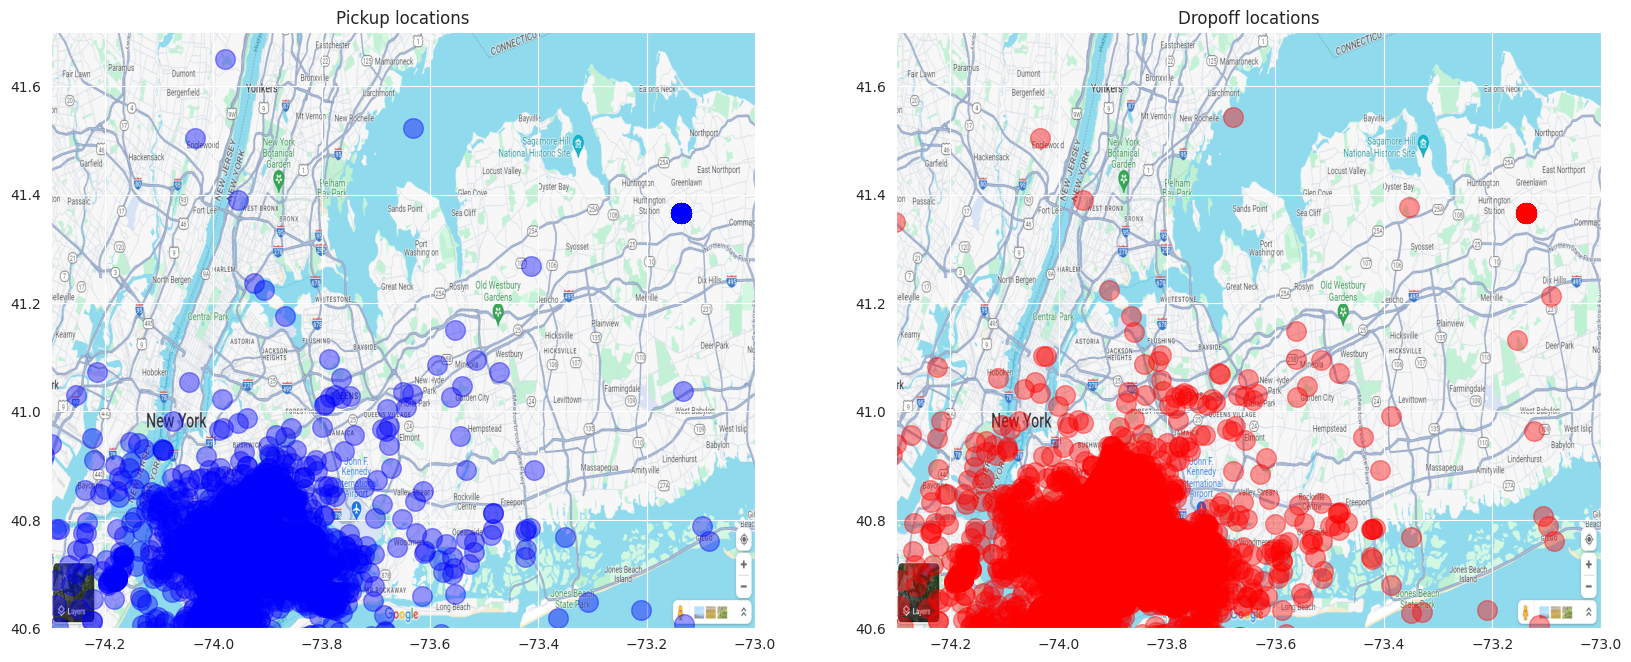

In [ ]:
plot_map(df_train, lim_place, map, s=200, alpha=0.4)

In [ ]:
# Неплохо, но немного сместились координаты долготы, поэтому попробуем другой способ.

# Folium — это мощная библиотека визуализации данных в Python, которая была создана в первую очередь для того, чтобы помочь людям визуализировать геопространственные данные.


https://www.kaggle.com/code/codebreaker619/introduction-to-folium

In [ ]:
!pip install geocoder

In [ ]:
!pip install geopy

In [ ]:
import folium

In [ ]:
locations = folium.Map(location=[40.7141667, -74.0063889], tiles='OpenStreetMap', zoom_start=11)
for i in df_train[:700].iterrows():
  folium.CircleMarker([i[1]['pickup_latitude'],i[1]['pickup_longitude']],
                      radius=5,
                      color = 'red',
                      popup=str(i[1]['pickup_latitude'])+', '+str(i[1]['pickup_longitude']),
                      fill_color='#FD8A6C'
                      ).add_to(locations)
locations

Визуализация passenger_count

<Axes: >

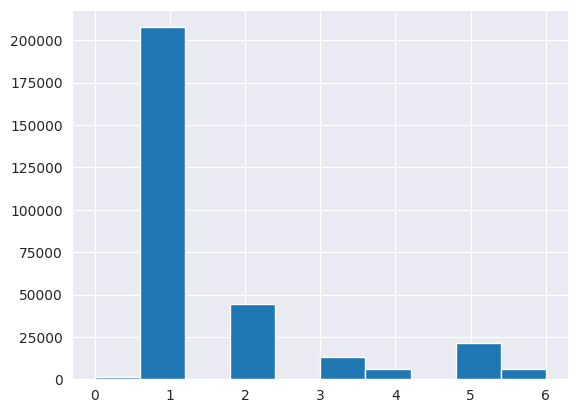

In [ ]:
# Построим гистограмму переменной passenger_count

df_train.passenger_count.hist()

Визуализация fare_amount

In [ ]:
# Cмотрим подробнее на гистограмму (график), которая касается суммы тарифа (fare amount)

In [ ]:
# Используем темную сетку в качестве фона графиков

sns.set_style('darkgrid')

In [ ]:
# Оценка плотности ядра (KDE) в Python - это непараметрический метод оценки функции плотности вероятности.
# Он используется для преобразования набора данных в гладкую непрерывную кривую, которая представляет распределение вероятностей.
# KDE может быть полезен при анализе распределений данных, поиске локальных максимумов и минимумов, а также при сравнении распределений разных наборов данных.

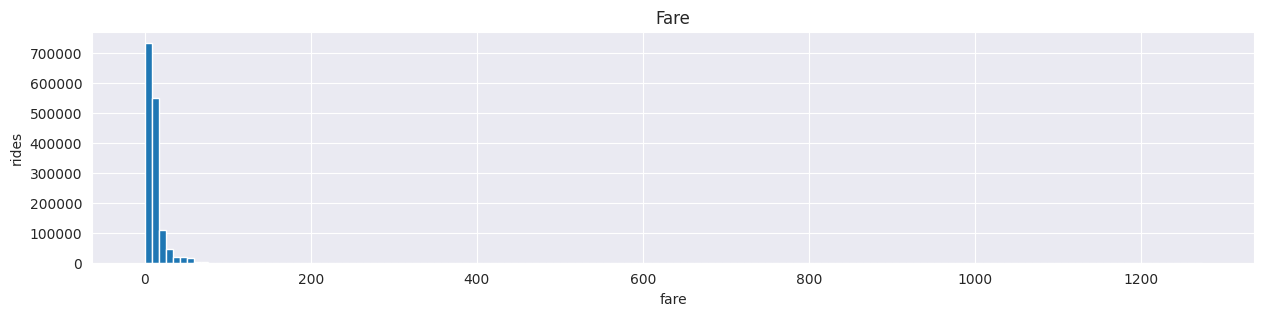

In [ ]:
# Построим график для распределения вероятности для столбца fare_amount (все значения)

plt.figure(figsize=(15, 3))

plt.hist(df_train['fare_amount'], bins=150)
plt.xlabel("fare")
plt.ylabel("rides")
plt.title("Fare")
plt.show()

# Мы видим, что в основном значения рапределены от 0 до приблизительно 80, сократим отображение

<Axes: xlabel='fare_amount', ylabel='Count'>

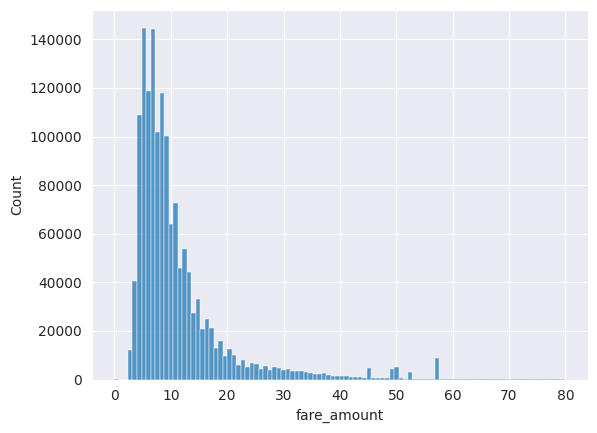

In [ ]:
# строим гистограмму для значений fare_amount меньше 80

sns.histplot(df_train[df_train['fare_amount'] < 80]['fare_amount'], bins=100, kde=False)

# В этот раз можно увидеть, что цена тарифа fare count сконцентрирована между 0 и 20,
# однако у нас также есть значения между 50 и 60. Cократим до 60

<Axes: xlabel='fare_amount', ylabel='Count'>

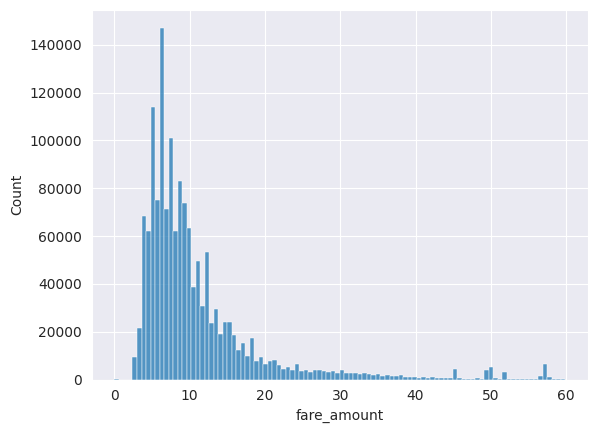

In [ ]:
# Cтроим гистограмму для значений fare_amount меньше 60

sns.histplot(df_train[df_train['fare_amount'] < 60]['fare_amount'], bins=100, kde=False)

Визуализация по дням недели

In [ ]:
# Разбивка по дням недели

plt.figure(figsize=(15, 3))

plt.hist(data['weekday'], bins=100)
plt.xlabel("days")
plt.ylabel("rides")
plt.title("Weekdays")
plt.show()

In [ ]:
palette = sns.color_palette("rainbow", 8)

plt.subplot(1, 2, 2)
days_list = {'monday' : 0, 'tuesday' : 1, 'wednesday' : 2, 'thursday' : 3, 'friday' : 4, 'saturday' : 5, 'sunday' : 6}
weeklyTraffic = data['weekday'].value_counts()
plt.pie(weeklyTraffic.values, labels=days_list, autopct="%.2f%%", explode=[0.1, 0.1, 0.1, 0, 0, 0, 0], colors=palette)
plt.xlabel("\nRides by Weekdays")
plt.show()

Матрицы корреляций

<Axes: title={'center': 'Correlation Heatmap for df_train'}>

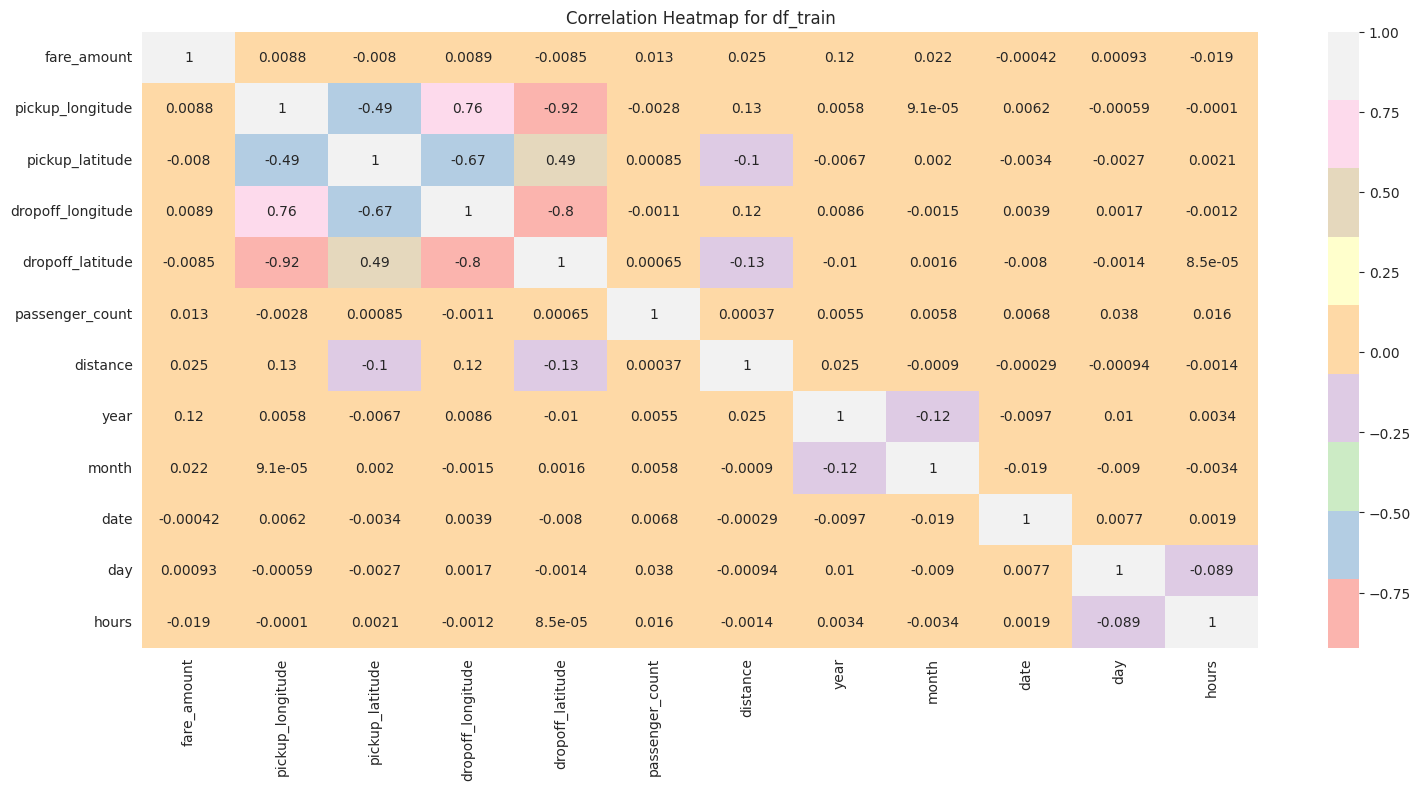

In [ ]:
# Построим матрицу корреляций

plt.figure(figsize = (18, 8))
plt.title('Correlation Heatmap for df_train')
corr = df_train.corr()
corr
sns.heatmap(corr, annot = True, cmap='Pastel1')

<Axes: title={'center': 'Correlation Heatmap for df_test'}>

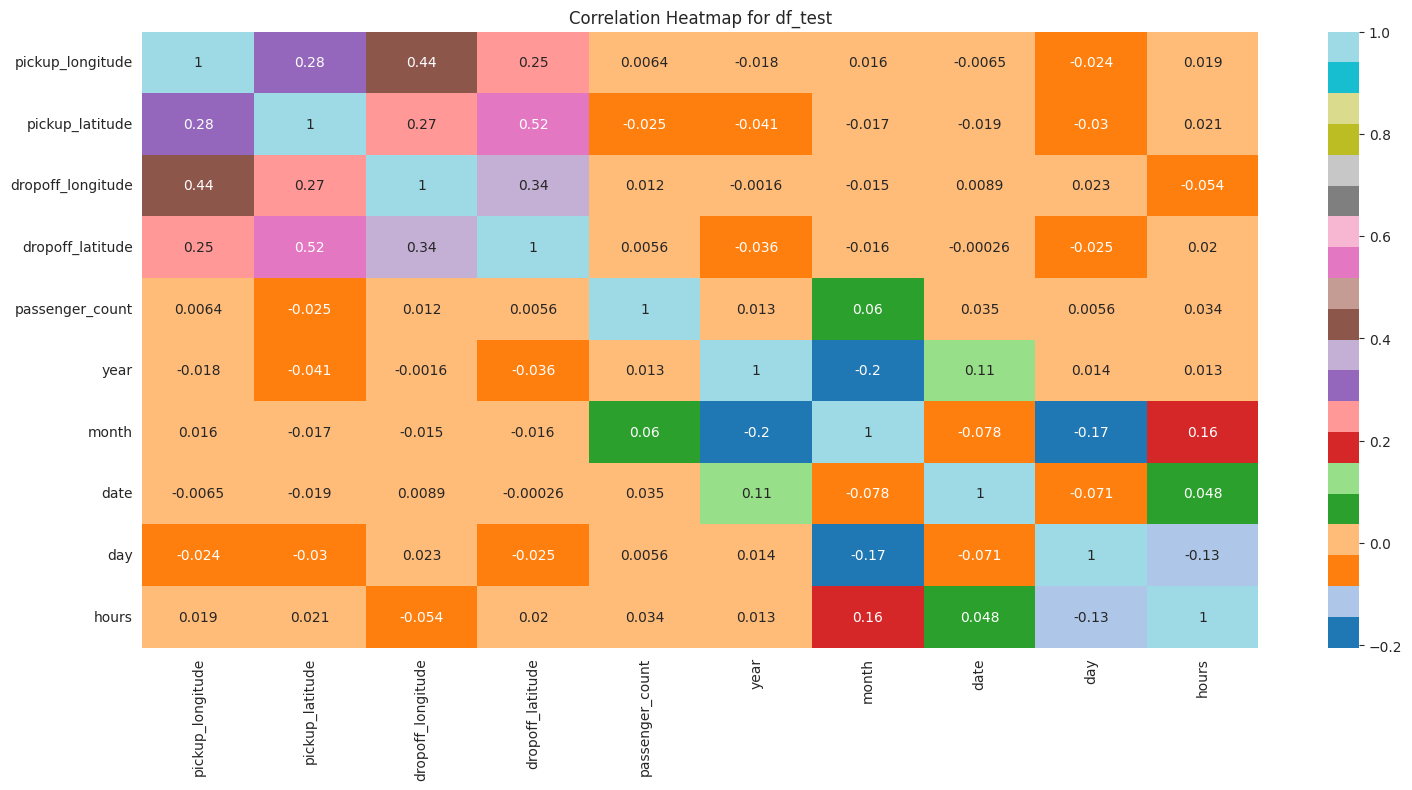

In [ ]:
plt.figure(figsize = (18, 8))
plt.title('Correlation Heatmap for df_test')
corr = df_test.corr()
corr
sns.heatmap(corr, annot = True, cmap='tab20')

# **Подготовка данных перед обучением**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.pipeline import make_pipeline

In [ ]:
df_train.drop(['fare_amount'], axis=1) # удалю целевую переменную из датасета df_train
y = df_train['fare_amount']
X = df_train[['year', 'time', 'distance', 'passenger_count']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Random Forest Classifier**

Как мы обсудили выше, при построении случайного леса каждое дерево строится на бутстрапированной подвыборке, полученной из исходной обучающей выборки случайным набором с повторениями. Понятно, что некоторые наблюдения попадут в такую подвыборку несколько раз, а некоторые не войдут в неё вообще. Для каждого дерева можем рассмотреть объекты, которые не участвовали в обучении и использовать их для валидации.

Усреднённая ошибка на неотобранных образцах по всему случайному лесу называется out-of-bag-ошибкой.

In [ ]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from mlxtend.evaluate import bias_variance_decomp # раскладывает ошибку получившегося алгоритма
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rt = RandomForestRegressor(max_depth=5, n_estimators = 100, random_state = 123, oob_score = True, n_jobs=-1)
rt.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_jobs=-1, oob_score=True, random_state=123)

In [ ]:
rt.oob_score_

0.7824416387363596

In [ ]:
ypred_test = rt.predict(X_test)
ypred_train = rt.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error

# Оценка точности на тестовом наборе данных
test_mse = mean_squared_error(y_test, ypred_test)
test_rmse = np.sqrt(test_mse)
print(f"Root Mean Squared Error on Test Data: {test_rmse}")

# Оценка точности на тренировочном наборе данных
train_mse = mean_squared_error(y_train, ypred_train)
train_rmse = np.sqrt(train_mse)
print(f"Root Mean Squared Error on Training Data: {train_rmse}")

Root Mean Squared Error on Test Data: 4.5483821992638545
Root Mean Squared Error on Training Data: 4.472754775536979


In [ ]:
# Оценка модели с использованием различных метрик
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, ypred_test)
r2 = r2_score(y_test, ypred_test)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 20.687780630580296
R^2 Score: 0.7812560314574213


# **Построение модели Random Forest с гиперпараметрами с импользованием Gridsearch**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Критерий для разделения узлов в градиентном бустинге определяет функцию потерь, которую модель пытается минимизировать в процессе обучения.

Критерий squared_error (среднеквадратичная ошибка) используется для задач регрессии и оценивает квадрат разности между прогнозируемым значением и реальным значением целевой переменной. Цель состоит в том, чтобы минимизировать сумму квадратов ошибок.

Критерий friedman_mse является вариантом критерия mean squared error, который учитывает изменения в градиенте ошибки и предоставляет более сложную функцию потерь. Обычно он используется в улучшенных версиях алгоритма градиентного бустинга для повышения его эффективности

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'criterion':['squared_error','friedman_mse'], 'max_depth':[5], 'max_leaf_nodes':[5]}
]
reg = RandomForestRegressor()
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring = 'neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END criterion=squared_error, max_depth=5, max_leaf_nodes=5; total time= 2.0min
[CV] END criterion=squared_error, max_depth=5, max_leaf_nodes=5; total time= 1.9min
[CV] END criterion=squared_error, max_depth=5, max_leaf_nodes=5; total time= 1.9min
[CV] END criterion=squared_error, max_depth=5, max_leaf_nodes=5; total time= 1.9min
[CV] END criterion=squared_error, max_depth=5, max_leaf_nodes=5; total time= 1.8min
[CV] END criterion=friedman_mse, max_depth=5, max_leaf_nodes=5; total time= 2.0min
[CV] END criterion=friedman_mse, max_depth=5, max_leaf_nodes=5; total time= 2.0min
[CV] END criterion=friedman_mse, max_depth=5, max_leaf_nodes=5; total time= 1.9min
[CV] END criterion=friedman_mse, max_depth=5, max_leaf_nodes=5; total time= 2.0min
[CV] END criterion=friedman_mse, max_depth=5, max_leaf_nodes=5; total time= 1.9min


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'criterion': ['squared_error', 'friedman_mse'],
                          'max_depth': [5], 'max_leaf_nodes': [5]}],
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
print('GridSearchCV Best Params:', grid_search.best_params_)
# GridSearchCV Best Params: {'criterion': 'squared_error', 'max_depth': 5, 'max_leaf_nodes': 5}

GridSearchCV Best Params: {'criterion': 'friedman_mse', 'max_depth': 5, 'max_leaf_nodes': 5}


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
# Вычисление MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Вычисление RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Вычисление коэффициента детерминации (R^2)
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")


Mean Squared Error: 26.611737523623766
Root Mean Squared Error: 5.158656561899015
R^2 Score: 0.7186185807129938



# **LightGBM**

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb
import warnings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

'boosting_type' - это гиперпараметр в библиотеке LightGBM, который определяет тип бустинга, который будет использоваться при обучении модели. Значения этого гиперпараметра могут быть:

'gbdt' (Gradient Boosting Decision Tree) - это классический метод градиентного бустинга, который использует деревья решений в качестве базовых моделей. Новые модели обучаются на остатках предыдущих моделей, чтобы корректировать ошибки.

In [ ]:
import lightgbm as lgb
dtrain = lgb.Dataset(X_train, label=y_train)
params = {}
params['learning_rate'] = 0.015
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mse'
params['num_leaves'] = 30
params['min_data'] = 100
params['max_depth'] = 10000
y_train=y_train.ravel()
reg= lgb.train(params, dtrain, 100)
results=reg.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.190485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 294
[LightGBM] [Info] Number of data points in the train set: 1159289, number of used features: 4
[LightGBM] [Info] Start training from score 11.337098


In [ ]:
from sklearn import metrics

score1 = metrics.mean_squared_error(y_test, results)
score2 = metrics.r2_score(y_test, results)
print('MSE: ', score1,'  R2 Score: ', score2)
# Вычисление RMSE
rmse = np.sqrt(score1)
print('Root Mean Squared Error:', rmse)

MSE:  24.497223065032383   R2 Score:  0.7409765751480869
Root Mean Squared Error: 4.949466947564392



# **Gridsearch LightGBM**

In [ ]:
estimator = lgb.LGBMRegressor(boosting_type= 'gbdt', metric='mse',objective='regression')

In [ ]:
param_grid = {
    'learning_rate': [0.005, 0.01, 0.015],
    'n_estimators': [50, 100, 500],
}
gbm = GridSearchCV(estimator, param_grid, cv=3)

In [ ]:
gbm.fit(X_train, y_train)
print('Best parameters found by grid search are:', gbm.best_params_)
#Best parameters found by grid search are: {'learning_rate': 0.015, 'n_estimators': 500}

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077500 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 294
[LightGBM] [Info] Number of data points in the train set: 772859, number of used features: 4
[LightGBM] [Info] Start training from score 11.334174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 294
[LightGBM] [Info] Number of data points in the train set: 772859, number of used features: 4
[LightGBM] [Info] Start training from score 11.339798
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054997 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 294
[LightGBM] [Info] Number of data points in the train set:

In [ ]:
gbm_best = gbm.best_estimator_
results = gbm_best.predict(X_test)
score1 = metrics.mean_squared_error(y_test,results )
score2 = metrics.r2_score(y_test,results )
print('MSE: ',score1, '  R2 Score: ', score2)
# MSE:  20.357853310692228   R2 Score:  0.7847445454054207
# Вычисление RMSE
rmse = np.sqrt(score1)
print('Root Mean Squared Error:', rmse)

MSE:  20.357853310692228   R2 Score:  0.7847445454054207
Root Mean Squared Error: 4.51196778697413



# **XGBOOST**

In [ ]:
!pip install XGBoost

In [ ]:
! pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.4 MB/s eta 0:00:00


In [ ]:
import xgboost
from xgboost import XGBRegressor
#from sklearn.pipeline import Pipeline
#from category_encoders.target_encoder import TargetEncoder

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
estimators = [
    ('encoder', TargetEncoder()),
    ('clf', XGBRegressor(random_state=120))
]
pipe = Pipeline(steps=estimators)
pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=120, ...))])

In [ ]:
# Просмотр гиперпараметров
xgboost = XGBRegressor()
xgboost.get_params()

In [ ]:
# Тренируем модель
xgboost = XGBRegressor(seed=0).fit(X_train, y_train)
# Параметр seed в модели XGBoost используется для установки начального значения для генерации псевдослучайных чисел. Это нужно для воспроизводимости результатов обучения модели. Если вы устанавливаете одинаковое значение seed при каждом запуске обучения модели, то результаты будут одинаковыми.

In [ ]:
# Делаем предсказания
xgboost_predict = xgboost.predict(X_test)

In [ ]:
# Вычисление метрик качества
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, xgboost_predict)
r2 = r2_score(y_test, xgboost_predict)
# Вывод результатов
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

Mean Squared Error: 21.076478488772022
R^2 Score: 0.7720951499041167


GridSearch XGBOOST

In [ ]:
import xgboost as xgb
regressor=xgb.XGBRegressor(eval_metric='rmsle', verbose=2)
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.005, 0.01, 0.015],
              'n_estimators': [50, 100, 500]
}

search = GridSearchCV(regressor, param_grid, cv=3).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:04:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:04:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:05:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:05:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:05:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, Use

The best hyperparameters are  {'learning_rate': 0.015, 'n_estimators': 500}


In [ ]:
#The best hyperparameters are  {'learning_rate': 0.015, 'n_estimators': 500}
regressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           eval_metric='rmsle')

regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

In [ ]:
# Вычисление метрик качества
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
# Вывод результатов
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 20.33589480462133
R^2 Score: 0.7849767254950585
Root Mean Squared Error: 4.509533767987699
